### Student details

Student name: Akshata Bheemasamudra Mallikarjunappa

Student ID: 23164204

# Task 1: Perceptrons

* Weight/height Data obtained from https://github.com/johnmyleswhite/ML_for_Hackers

In [8]:
# import dependencies
import numpy as np

### Perceptron class
From: https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html

**Note:** The predict function returns either 1 or -1 as labels for the data. Therefore, the training data must match these labels.

In [9]:
class Perceptron(object):

    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] +=  update * xi
                self.w_[0] +=  update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

### Read the data
(provided - should be completed in previous E-tivity)

In [10]:
import pandas

# Read the data from the .csv, using the first row as the headers of the data
data = pandas.read_csv('01_heights_weights_sex.csv',header=0)

# X is the features in our dataset
X = data.iloc[:,1:3].values
# y is the Labels in our dataset, converted to integers
y = data.iloc[:,0].values
# Note the conversion to 1 and -1, to match the perceptron class
y = np.where(y == "Female", 1, -1)

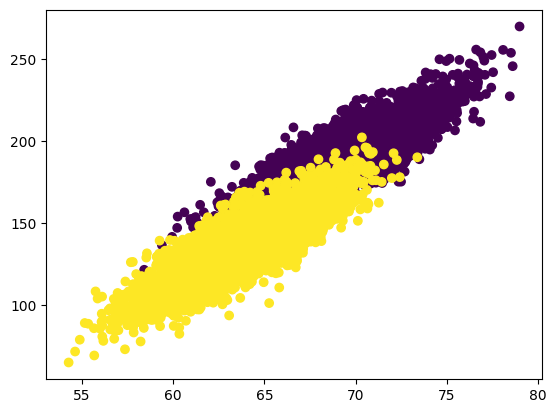

In [11]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1],c=y);

### Train/Test Split
(provided - should be completed in previous E-tivity)

In [23]:
# divide the dataset in train test using scikit learn
# now the model will train in training dataset and then we will use test dataset to predict its accuracy

from sklearn.model_selection import train_test_split

# set random_state to a fixed number, so while the outcome is random, it is repeatible (same result each time)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Train the algorithm (Task)

In [24]:
# Training the perceptron algorithm created earlier in this file with sample data
p = Perceptron()
p.train(X_train,y_train)


### Calculate the accuarcy score using the test data and sklearn.metrics (Task)

In [36]:
# Importing the sklearn.metrics to calculate the accuracy
from sklearn.metrics import accuracy_score

# calculating the accuracy by first predicting the values for test data
y_pred = p.predict(X_test)
accuracy = round(accuracy_score(y_test,y_pred),2)
print(f'Accuracy score for the test data is {accuracy}')

Accuracy score for the test data is 0.85


### Visualisations (Task)
1. Visualise the errors at each training epoch. Hint, the errors for each epoch are stored in the errors class variable
2. Using many random inputs (e.g. 5000) plot to see if you can see the decision boundary. In this case, you will not be using the pandas dataframe, so it is probably better to use matplotlib

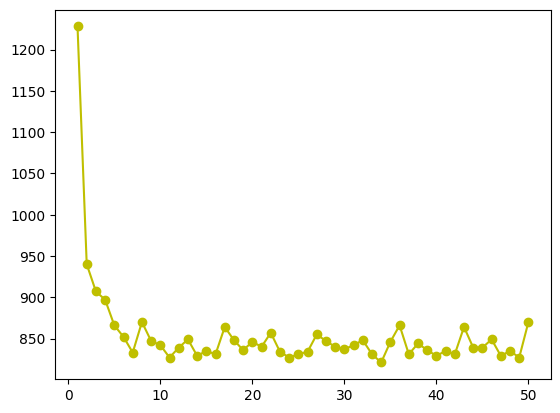

In [16]:
# Visualizing the errors at each training epoch
plt.plot(range(1,len(p.errors_)+1),p.errors_,'-oy')

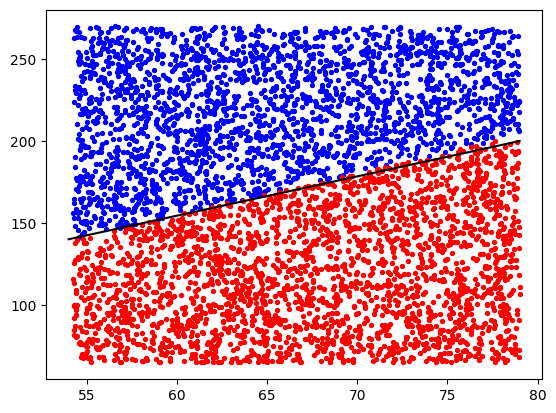

In [38]:
# Using 5000 random inputs to check if decision boundary is visible
#creating random data
np.random.seed(0)
# creating random heights and weights data between from their minimum and maximum range
random_height = np.random.uniform(min(data['Height']),max(data['Height']),5000).reshape(5000,1)
random_weight = np.random.uniform(min(data['Weight']),max(data['Weight']),5000).reshape(5000,1)

#concatenating random heights and weights to create a new 2D array dataset
random_points = np.concatenate((random_height,random_weight),axis = 1)

new_prediction = p.predict(random_points)

# Male height and weight
a = random_points[new_prediction == -1][:,0]
b = random_points[new_prediction == -1][:,1]
# Female height and weight
c = random_points[new_prediction == 1][:,0]
d = random_points[new_prediction == 1][:,1]
# plotting a scatter graph to visualize the new boundary
plt.scatter(a,b, color = 'blue', s = 8, label = 'Male')
plt.scatter(c,d, color = 'red', s = 8, label = 'Female')
#drawing the decision boundary
decision_boundary_x = np.array([54,79])
decision_boundary_y = np.array([140,200])
plt.plot(decision_boundary_x,decision_boundary_y,'k')

### Then, discuss the following in Markdown cells:
1.	Describe what is happening as the training progresses?

2.	Do we arrive at the very best solution at the last epoch, or is there an epoch with a lower error? Why is that?
3.	Why can’t we get zero error with this data?


1. Describe what is happening as the training progresses?

The aim of the training is to find the optimal values of weights and error rate such that the perceptron model is able to classify and separate the data achieving a decision boundary. Through each epoch, the error rate is seen to be reduced inititally however there is a continuous fluctuation of the error rate after a 7th epoch  It also shows the model converges to an extent and is learning from the training data quickly however it has not acheived its best fit.



2. Do we arrive at the very best solution at the last epoch, or is there an epoch with a lower error? Why is that?



In [62]:
errors = p.errors_
print(errors)
print(f'The lowest error is : {min(errors)} and occurs at epoch rate : {errors.index(min(errors))}')
print(f'The last error is : {errors[-1]} and at last epoch  : {50} ')

[1228, 940, 907, 897, 866, 852, 833, 870, 847, 842, 827, 839, 849, 829, 835, 831, 864, 848, 836, 846, 840, 857, 834, 827, 831, 834, 855, 847, 840, 837, 842, 848, 831, 821, 846, 866, 831, 844, 836, 829, 835, 831, 864, 839, 839, 849, 829, 835, 827, 870]
The lowest error is : 821 and occurs at epoch rate : 33
The last error is : 870 and at last epoch  : 50 


No, we did not find the best solution at the last epoch 50. As seen above, the error(870) at last epoch is higher than the lowest error (821) we found at epoch 33. We may not always arrive at the best solution at the last epoch due to random initialization, learning rate, previous error which may affect the performance of perceptron to achieve zero error.

3. Why can’t we get zero error with this data?


The perceptron is a linea model and can model only linear relationships between features and labels, however there might be some non-linear relationships between the data which is not visible.


**Task 1 Option 1 (b)**

Clearly, after a certain amount of learning, nothing useful is being done by the algorithm. A common approach to reduce learning time is to have a minimum acceptable error. This is known as an early exit criterion.

Create a copy of the Perceptron class, and rename it to something reasonable, like PerceptronEE. Implement an early exit, to exit the training once convergence has been achieved, i.e. once the error is at an acceptable level.




In [33]:
class PerceptronEE(object):

    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []


        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] +=  update * xi
                self.w_[0] +=  update
                errors += int(update != 0.0)
            self.errors_.append(errors)

            # Early exit condition
            if errors < 800:
              break
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [39]:
p_EE = PerceptronEE()
p_EE.train(X_train,y_train)

In [40]:
# Accuracy score for the new model
from sklearn.metrics import accuracy_score

# calculating the accuracy by first predicting the values for test data
y_pred1= p_EE.predict(X_test)
new_accuracy = round(accuracy_score(y_test,y_pred),2)
print(f'Accuracy score for the test data is {new_accuracy}')


Accuracy score for the test data is 0.85


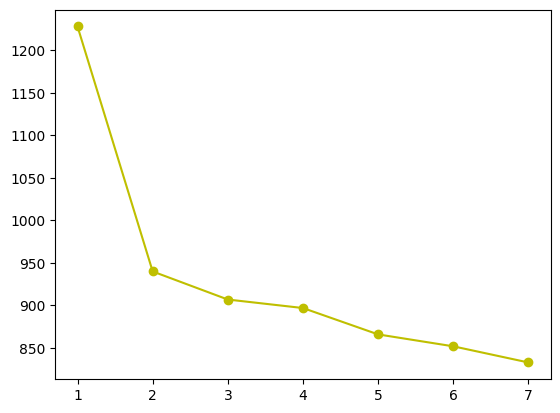

In [42]:
# Visualizing the errors at each training epoch
plt.plot(range(1,len(p_EE.errors_)+1),p_EE.errors_,'-oy')